In [382]:
from cmath import *
from math import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [383]:
'''# Resistências
R1 = 10
R2 = 10

# Indutâncias
L1 = 1*10**-3
L2 = 1*10**-3

# Capacitâncias
C1 = 1*10**-6
C2 = 1*10**-6

# Frequência
freq = 1/(sqrt(L1*C1))

# Frequência Angular
w = 2 * pi * freq

# Tensão de Pico
t_pico = 1 / w

# Indutância Mútua
k = 0.1
M = k * sqrt(L1 * L2)

# Impedâncias
XL1 = 1j * w * L1
XL2 = 1j * w * L2

XC1 = 1/(1j * w * C1)
XC2 = 1/(1j * w * C2)

XM = 1j * w * M
'''

'# Resistências\nR1 = 10\nR2 = 10\n\n# Indutâncias\nL1 = 1*10**-3\nL2 = 1*10**-3\n\n# Capacitâncias\nC1 = 1*10**-6\nC2 = 1*10**-6\n\n# Frequência\nfreq = 1/(sqrt(L1*C1))\n\n# Frequência Angular\nw = 2 * pi * freq\n\n# Tensão de Pico\nt_pico = 1 / w\n\n# Indutância Mútua\nk = 0.1\nM = k * sqrt(L1 * L2)\n\n# Impedâncias\nXL1 = 1j * w * L1\nXL2 = 1j * w * L2\n\nXC1 = 1/(1j * w * C1)\nXC2 = 1/(1j * w * C2)\n\nXM = 1j * w * M\n'

In [384]:
def CalculaLeonardo(Uf, Rc):
    Z=np.array([
        [R1+XL1+XC1             ,    -XM],
        [-XM, R2+XL2+(Rc/(Rc*1j*w*C2+1))]
                ])
    V=np.array([Uf,
                0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

In [385]:
'''
Uf = 10
Rc = 140
k = 0.1
'''

'\nUf = 10\nRc = 140\nk = 0.1\n'

In [386]:
'''
capacitores = [150*10**-9, 0.1*10**-6, 0.47*10**-6, 1*10**-6, 4.7*10**-6]
frequencias = np.arange(1*10**-10,100*10**3,1)

V2_list = []
L_list = []
f_list = []
indices = []
v2_corr = []

Rdc = 0.5

n = 0

for C in capacitores:
    V2_list = []
    L_list = []
    f_list = []
    indices = []
    v2_corr = []

    n = n + 1
    for f in frequencias:
        
        f_list.append(f)

        C1 = C2 = C

        R = R1 = R2 = Rdc + (2*Rdc/(100*10**3)) * f
        
        w = 2 * pi * f
        L = L1 = L2 = 1/((f**2)*4*(pi**2)*C)

        L_list.append(L)

        XC = XC1 = XC2 = 1/(1j * w * C)
        XL = XL1 = XL2 = 1j * w * L
        
        M = k * sqrt(L**2)
        XM = 1j * w * M

        i1, i2 = CalculaLeonardo(Uf, Rc)

        V2 = ((Rc*XC)/(Rc+XC))*i2
        
        V2_list.append(abs(V2))
    
    for j, valor in enumerate(V2_list):
        if 10 <= valor <= 12:
            indices.append(j)
            v2_corr.append(valor)
    
    if n == 5:
        print(f'indices: {indices}')
        print(f'V2: {v2_corr}')
        print()
        print(f'Capacitor: C{n},\nÍndices: {indices}')
        for i in indices:
            print(f'Tensão: {V2_list[i]}')
            print(f'Indutância: {L_list[i]}')
            print(f'Frequência: {f_list[i]}')
            print()

    plt.plot(frequencias, V2_list, label="C" + str(n))
    plt.xlabel("Frequência de Ressonância (Hz)")
    plt.ylabel("Tensão (V2)")
    plt.legend()
    plt.grid()
plt.show()
'''

'\ncapacitores = [150*10**-9, 0.1*10**-6, 0.47*10**-6, 1*10**-6, 4.7*10**-6]\nfrequencias = np.arange(1*10**-10,100*10**3,1)\n\nV2_list = []\nL_list = []\nf_list = []\nindices = []\nv2_corr = []\n\nRdc = 0.5\n\nn = 0\n\nfor C in capacitores:\n    V2_list = []\n    L_list = []\n    f_list = []\n    indices = []\n    v2_corr = []\n\n    n = n + 1\n    for f in frequencias:\n        \n        f_list.append(f)\n\n        C1 = C2 = C\n\n        R = R1 = R2 = Rdc + (2*Rdc/(100*10**3)) * f\n        \n        w = 2 * pi * f\n        L = L1 = L2 = 1/((f**2)*4*(pi**2)*C)\n\n        L_list.append(L)\n\n        XC = XC1 = XC2 = 1/(1j * w * C)\n        XL = XL1 = XL2 = 1j * w * L\n        \n        M = k * sqrt(L**2)\n        XM = 1j * w * M\n\n        i1, i2 = CalculaLeonardo(Uf, Rc)\n\n        V2 = ((Rc*XC)/(Rc+XC))*i2\n        \n        V2_list.append(abs(V2))\n    \n    for j, valor in enumerate(V2_list):\n        if 10 <= valor <= 12:\n            indices.append(j)\n            v2_corr.append(

f = 13700

In [387]:

freq = f = 13700
C = C1 = C2 = 4.7*10**-6
L = L1 = L2 = 2.84e-05
Uf = (2/pi)*7
Rc = 180
R = R1 = R2 = 0.3
k = 0.4

In [388]:
Tensão: 11.995933305756028
Indutância: 2.8477045607519828e-05
Frequência: 13757.0000000001

# Lt = 1/((f**2)*4*(pi**2)*C)

w = 2 * pi * f

XC = XC1 = XC2 = 1/(1j * w * C)
XL = XL1 = XL2 = 1j * w * L

M = k * sqrt(L**2)
XM = 1j * w * M

print(XC)
print(XL)
print(XM)

print('---------------')
print(f'L = {L} H')
print(f'R fio = {R} Ohms')
#print(f'f Teste: {1/(2*pi*sqrt(L*C))} Hz')

-2.4717338576160173j
2.4446617393174335j
0.9778646957269733j
---------------
L = 2.84e-05 H
R fio = 0.3 Ohms


In [389]:
i1, i2 = CalculaLeonardo(Uf, Rc)
i1, i2

((1.4110836868308796-0.08955955867674727j),
 (-0.06654181543361416+4.126785520660412j))

In [390]:
V2 = ((Rc*XC)/(Rc+XC))*i2
abs(V2)

10.200679731079859

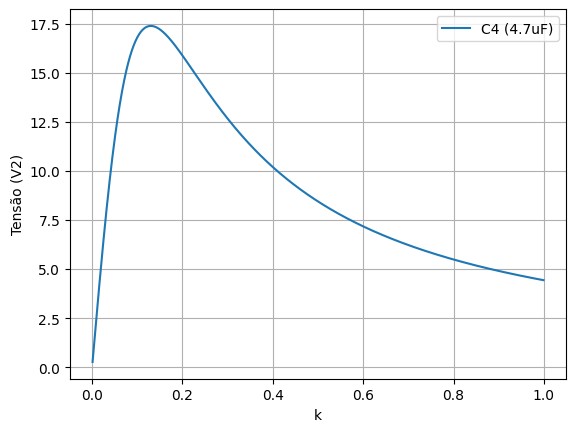

V2_list2: [0.2668171832645622, 0.5335409302667317, 0.800077912184743, 1.0663350148227093, 1.332219445286142, 1.5976388378954305, 1.8625013590880075, 2.126715811063965, 2.3901917339348784, 2.6528395061415213, 2.9145704429129657, 3.175296892547281, 3.4349323303024684, 3.693391449695622, 3.9505902510181707, 4.20644612688575, 4.460877944652417, 4.713806125530699, 4.965152720271141, 5.21484148126761, 5.462797930967616, 5.708949426479995, 5.953225220285775, 6.195556516971537, 6.43587652591808, 6.674120509890878, 6.910225829492149, 7.14413198344786, 7.3757806447159755, 7.605115692415246, 7.832083239586385, 8.056631656809692, 8.278711591714906, 8.49827598443063, 8.715280079031217, 8.929681431049655, 9.141439911134478, 9.350517704938095, 9.556879309332391, 9.760491525055432, 9.961323445900403, 10.159346444564466, 10.354534155281367, 10.546862453366732, 10.736309431809799, 10.922855375049242, 11.106482730074129, 11.287176074993777, 11.464922085222332, 11.63970949742533, 11.811529071376544, 11.98

In [391]:
# freq fixa com K variando

k_list = np.arange(0.001, 1, 0.001)
V2_list2 = []


for k in k_list:
    M = k * sqrt(L**2)
    XM = 1j * w * M
    i1, i2 = CalculaLeonardo(Uf, Rc)
    V2 = ((Rc*XC)/(Rc+XC))*i2
    V2_list2.append(abs(V2))

plt.plot(k_list, V2_list2, label="C4 (4.7uF)")
plt.xlabel("k")
plt.ylabel("Tensão (V2)")
plt.legend()
plt.grid()
plt.show()

#debug

print(f'V2_list2: {V2_list2}')
print(f'L: {L}')
print(f'f: {f}')
print(f'C: {C}')
print(f'Uf: {Uf}')
print(f'Rc: {Rc}')
print(f'R: {R}')
print(f'k: {k}')
print(f'XC: {XC}')
print(f'XL: {XL}')
print(f'XM: {XM}')
print(f'i1: {i1}')
print(f'i2: {i2}')
print(f'V2: {V2}') 




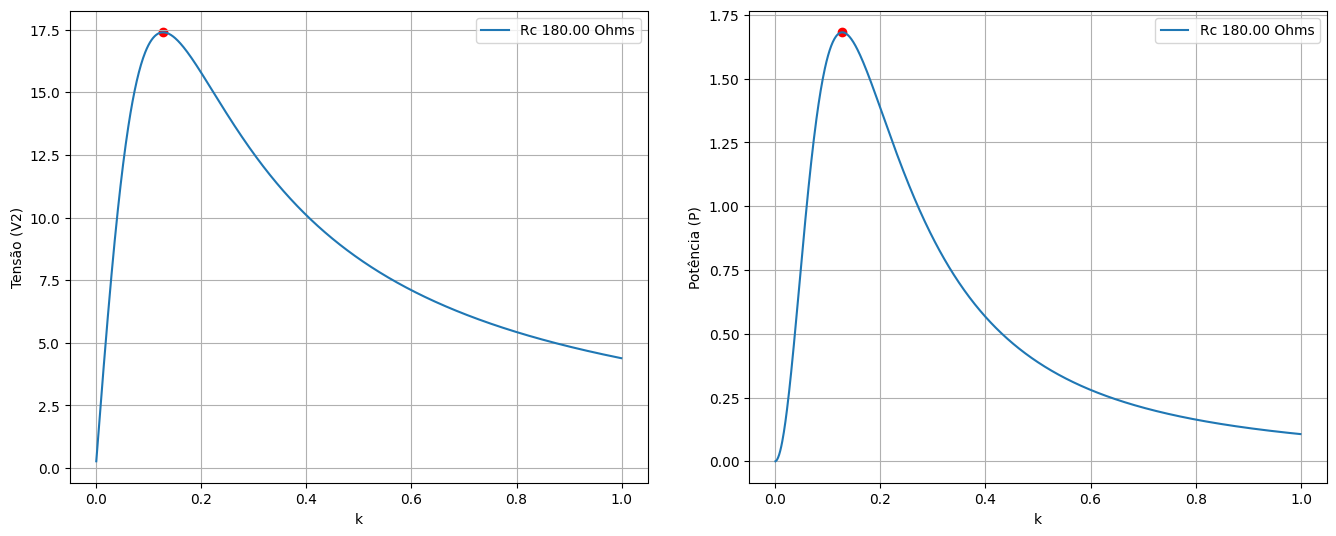

In [392]:
n=0
Rc_list_1 = [180]

plt.figure(figsize=(14, 6))

Max_k = []
Max_kP = []
Max__v = []
Max__vP = []

for Rc in Rc_list_1:
    ks_max = []
    vs_max = []
    vsp_max = []
    ksp_max = []
    Vcarga_list = []
    P_list = []
    V_max = 0  # Valor máximo para esta RC
    k_max = 0   # Valor de k correspondente ao máximo
    P_max = 0
    n+=1
    for k in k_list:
        # Seu código para calcular Vcarga_list e P_list
        C1 = C2 = C
        R = 0.2
        w = 2 * pi * f
        L = L1 = L2 = 1/((f**2)*4*(pi**2)*C)
        XC = XC1 = XC2 = 1/(1j * w * C)
        XL = XL1 = XL2 = 1j * w * L
        M = k * sqrt(L**2)
        XM = 1j * w * M
        i1, i2 = CalculaLeonardo(Uf, Rc)
        V2 = ((Rc*XC)/(Rc+XC))*i2
        Vcarga_list.append(abs(V2))

        P = ((V2)**2)/Rc
        P_list.append(abs(P))
        
        # Atualizando o valor máximo e o valor de k correspondente
        if abs(V2) > V_max:
            V_max = abs(V2)
            k_max = k
            vs_max.append(abs(V2))
            ks_max.append(k)
        if abs(P) > P_max:
            P_max = abs(P)
            k_max_P = k
            vsp_max.append(abs(P))
            ksp_max.append(k)
    
    Max__v.append(max(vs_max))
    Max_k.append(max(ks_max))
    Max_kP.append(max(ksp_max))  # Armazenando o valor de k correspondente à maior potência para esta Rc
    Max__vP.append(max(vsp_max))

    plt.subplot(1, 2, 1)  # Subplot na posição 1
    plt.plot(k_list, Vcarga_list, label = "Rc " + f"{Rc_list_1[n-1]:.2f} Ohms")
    plt.scatter(k_max, V_max, color='red')
    plt.xlabel("k")
    plt.ylabel("Tensão (V2)")
    plt.grid()
    plt.legend()



    # Plotando o gráfico de P vs K
    plt.subplot(1, 2, 2)  # Subplot na posição 2
    plt.plot(k_list, P_list, label = "Rc " + f"{Rc_list_1[n-1]:.2f} Ohms")
    plt.scatter(k_max_P, P_max, color='red')
    plt.xlabel("k")
    plt.ylabel("Potência (P)")
    plt.grid()
    plt.legend()

plt.tight_layout(pad=3.0)  # Ajusta automaticamente a disposição dos subplots
plt.show()

Rc = 180 via calculo